# Classification using Deep Neural Network

## Multiclass Classification using Deep Neural Networks: Example: Use the OCR Letter Recognition dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import keras

2025-05-06 21:37:14.597946: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-06 21:37:14.598399: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-06 21:37:14.600609: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-06 21:37:14.606451: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746547634.616380   74343 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746547634.61

In [2]:
column_names = [
    'letter', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar',
    'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx'
]
df = pd.read_csv("letter-recognition.data", header=None, names=column_names)
df.head()

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["letter"] = le.fit_transform(df["letter"])

In [4]:
x = df.drop(columns=["letter"])
y = df["letter"]

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

In [7]:
from keras.utils import to_categorical

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [8]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation="relu", input_dim=16))
model.add(Dense(64, activation="relu"))
model.add(Dense(26, activation="softmax"))

/home/kishanlal-choudhary/BE-SEM-8/LP-5/DL/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1746547635.865910   74343 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1746547635.866222   74343 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [9]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [10]:
model.fit(x=x_train_scaled, y=y_train_categorical, batch_size=100, epochs=16, validation_split=0.2)

Epoch 1/16
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2818 - loss: 2.7045 - val_accuracy: 0.6634 - val_loss: 1.3177
Epoch 2/16
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6975 - loss: 1.1359 - val_accuracy: 0.7472 - val_loss: 0.9023
Epoch 3/16
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7724 - loss: 0.8142 - val_accuracy: 0.7909 - val_loss: 0.7415
Epoch 4/16
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8121 - loss: 0.6657 - val_accuracy: 0.8178 - val_loss: 0.6300
Epoch 5/16
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8357 - loss: 0.5783 - val_accuracy: 0.8425 - val_loss: 0.5610
Epoch 6/16
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8608 - loss: 0.5014 - val_accuracy: 0.8572 - val_loss: 0.4948
Epoch 7/16
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8742 - loss: 0.4361 - val_accuracy: 0.8763 - val_loss: 0.4458
Epoch 8/16
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8820 - loss: 0.4073 - val_accuracy: 0.

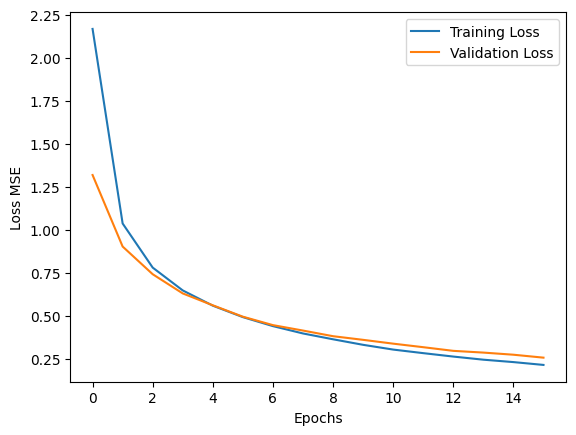

In [11]:
plt.plot(model.history.history["loss"], label="Training Loss")
plt.plot(model.history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss MSE")
plt.legend()
plt.show()

In [12]:
loss, accuracy = model.evaluate(x=x_test_scaled, y=y_test_categorical)

print("Loss : ", loss)
print("Accuracy : ", accuracy*100)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.9245 - loss: 0.2501
Loss :  0.2503916621208191
Accuracy :  92.75000095367432


In [13]:
predictions = model.predict(x_test_scaled[:5])
predicted_classes = le.inverse_transform(np.argmax(predictions, axis=1))
true_classes = le.inverse_transform(y_test[:5])

print("Predicted : ", predicted_classes)
print("True : ", true_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted :  ['Z' 'L' 'A' 'E' 'Q']
True :  ['T' 'L' 'A' 'E' 'Q']
